# Pre-Processing and Feature Selection

In this notebook, feature selection will be performed on the data in order to identify identify the variables that are most closely associated with the survival of transplant patients.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# load data
df = pd.read_csv('data/bone_marrow.csv')

## 1. Pre-Processing'

Before getting to feature selection, let us first pre-process the data.

### A. Missing Values

In [3]:
# how many columns have missing data, and by how much?
df.isna().sum()

donor_age                      0
donor_age_below_35             0
donor_ABO                      0
donor_CMV                      2
recipient_age                  0
recipient_age_below_10         0
recipient_age_int              0
recipient_gender               0
recipient_body_mass            2
recipient_ABO                  1
recipient_rh                   2
recipient_CMV                 14
disease                        0
disease_group                  0
gender_match                   0
ABO_match                      1
CMV_status                    16
HLA_match                      0
HLA_mismatch                   0
antigen                        1
allel                          1
HLA_group_1                    0
risk_group                     0
stem_cell_source               0
tx_post_relapse                0
CD34_x1e6_per_kg               0
CD3_x1e8_per_kg                5
CD3_to_CD34_ratio              5
ANC_recovery                   5
PLT_recovery                  17
acute_GvHD

From above, we can see that 15 coolumns have missing data.

In particular, the majority of the time_to_acute_GvHD_III_IV column is missing. Since this variable is therefore not likely to be useful, let's drop it.

In [4]:
# drop time_to_acute_GvHD_III_IV
df.drop('time_to_acute_GvHD_III_IV', axis=1, inplace=True)

However, there is still a substantial amount of missing data (i.e. in the extensive_chronic_GvHD columm). We would be losing a lot of data if all of these variables were dropped.

Let's instead impute the missing data by using mean (for continuous variables) or mode (for categorical variables). 

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
# imputing missing values for categorical variables

df.donor_CMV = SimpleImputer(missing_values=np.NaN, strategy='most_frequent').fit_transform(df[['donor_CMV']])
df.recipient_ABO = SimpleImputer(missing_values=np.NaN, strategy='most_frequent').fit_transform(df[['recipient_ABO']])
df.recipient_rh = SimpleImputer(missing_values=np.NaN, strategy='most_frequent').fit_transform(df[['recipient_rh']])
df.recipient_CMV = SimpleImputer(missing_values=np.NaN, strategy='most_frequent').fit_transform(df[['recipient_CMV']])
df.ABO_match = SimpleImputer(missing_values=np.NaN, strategy='most_frequent').fit_transform(df[['ABO_match']])
df.CMV_status = SimpleImputer(missing_values=np.NaN, strategy='most_frequent').fit_transform(df[['CMV_status']])
df.antigen = SimpleImputer(missing_values=np.NaN, strategy='most_frequent').fit_transform(df[['antigen']])
df.allel = SimpleImputer(missing_values=np.NaN, strategy='most_frequent').fit_transform(df[['allel']])
df.extensive_chronic_GvHD = SimpleImputer(missing_values=np.NaN, strategy='most_frequent').fit_transform(df[['extensive_chronic_GvHD']])

In [7]:
# imputing missing values for continuous variables

df.recipient_body_mass = SimpleImputer(missing_values=np.NaN, strategy='mean').fit_transform(df[['recipient_body_mass']])
df.CD3_x1e8_per_kg = SimpleImputer(missing_values=np.NaN, strategy='mean').fit_transform(df[['CD3_x1e8_per_kg']])
df.CD3_to_CD34_ratio = SimpleImputer(missing_values=np.NaN, strategy='mean').fit_transform(df[['CD3_to_CD34_ratio']])
df.ANC_recovery = SimpleImputer(missing_values=np.NaN, strategy='mean').fit_transform(df[['ANC_recovery']])
df.PLT_recovery = SimpleImputer(missing_values=np.NaN, strategy='mean').fit_transform(df[['PLT_recovery']])

In [8]:
# make sure there are no more missing data
assert df.isna().sum().sum() == 0

### B. Standardize Variables

In [9]:
from sklearn.preprocessing import StandardScaler

# need to rescale (standardize) the following variables
cols_to_scale = ['donor_age', 'recipient_age', 'recipient_body_mass',
                 'CMV_status', 'antigen', 'allel', 'CD34_x1e6_per_kg',
                 'CD3_x1e8_per_kg', 'ANC_recovery', 'PLT_recovery',
                 'survival_time']

ss = StandardScaler()
df[cols_to_scale] = ss.fit_transform(df[cols_to_scale])

### C. Encode Categorical Variables

In [10]:
df = pd.get_dummies(df, columns=list(df.columns[df.dtypes=='object']),
                       drop_first=False)

In [11]:
df.head()

,donor_age,recipient_age,recipient_body_mass,CMV_status,antigen,allel,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,...,tx_post_relapse_no,tx_post_relapse_yes,acute_GvHD_II_III_IV_no,acute_GvHD_II_III_IV_yes,acute_GvHD_III_IV_no,acute_GvHD_III_IV_yes,extensive_chronic_GvHD_no,extensive_chronic_GvHD_yes,relapse_no,relapse_yes
0,-1.289981,-0.062658,-0.041097,1.335283,-0.922760,-0.843864,-0.474500,0.167062,1.338760,1.246508,...,1,0,0,1,0,1,1,0,1,0
1,-1.227878,-1.120972,-0.779836,-1.428901,-0.922760,-0.843864,-0.747563,-1.141966,11.078295,0.233720,...,1,0,0,1,1,0,1,0,0,1
2,-0.857918,-0.629612,-0.636192,0.413889,-0.922760,-0.843864,-0.399661,-1.139332,19.013230,2.596891,...,1,0,0,1,1,0,1,0,0,1
3,0.753104,1.543712,0.728424,-0.507506,-0.922760,-0.843864,-0.772846,-1.213080,29.481647,2.596891,...,1,0,0,1,0,1,1,0,1,0
4,-0.013717,-1.631231,-1.374932,-1.428901,1.083706,0.283297,4.041147,2.187231,3.972255,-0.441471,...,1,0,1,0,1,0,1,0,1,0


### D. Check Target Variable is Balanced

In [12]:
df.survival_status.value_counts(normalize=True)

0    0.545455
1    0.454545
Name: survival_status, dtype: float64

It is balanced!

In [13]:
# save new df
df.to_csv('data/bone_marrow_processed.csv', index=False)

## 2. Feature Selection

Now let's move onto feature selection.

In [14]:
# split columns into features (X) & result (y)
X = df.drop('survival_status', axis = 1)
y = df['survival_status']

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=.8)

### A. LASSO

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logr = LogisticRegression(C=0.3, penalty="l1", solver="liblinear")
logr.fit(X_train, y_train);

In [18]:
# which columns were kept?
X_train.columns[logr.coef_[0] != 0]

Index(['recipient_body_mass', 'CD3_to_CD34_ratio', 'survival_time',
       'recipient_CMV_absent', 'ABO_match_mismatched', 'risk_group_low',
       'relapse_no'],
      dtype='object')

### B. Tree Based Model Feature Importance

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train,y_train)

In [20]:
feature_importances = pd.Series(rf.feature_importances_,index=X_train.columns)
feature_importances.sort_values(ascending=False).round(3).head(20)

survival_time                 0.382
CD3_to_CD34_ratio             0.042
recipient_age                 0.040
PLT_recovery                  0.039
relapse_no                    0.038
donor_age                     0.034
relapse_yes                   0.034
CD34_x1e6_per_kg              0.032
CD3_x1e8_per_kg               0.030
recipient_body_mass           0.028
ANC_recovery                  0.023
CMV_status                    0.010
disease_lymphoma              0.010
acute_GvHD_III_IV_no          0.010
acute_GvHD_III_IV_yes         0.008
extensive_chronic_GvHD_yes    0.008
risk_group_high               0.007
ABO_match_matched             0.007
donor_ABO_A                   0.007
acute_GvHD_II_III_IV_no       0.006
dtype: float64

In [21]:
import matplotlib.pyplot as plt

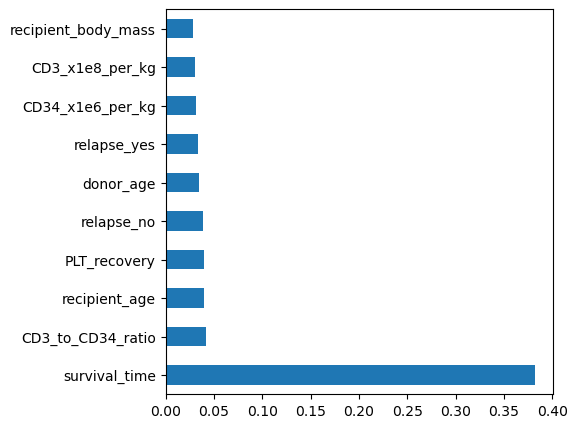

In [22]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
feature_importances.sort_values(ascending=False).head(10).plot.barh(ax=ax);
ax.set_yticklabels(ax.get_yticklabels(),fontsize=10);

Survival time seems to be the strongest feature by a very large margin, whilst the remaining selected variables all seem to be quite similar. Compared to the features selected by LASSO above, doses of CD34+ and CD3+ cells appear in both feature selections, indicating importance. Whether the patient relapsed also appears in both feature selections, although whether the patient developed extensive chronic GvHD has been excluded by this model.

There also seem to be features about the donors or recipients that contribute towards survival - such as the recipient's body mass, recipient age, and donor age.

### C. SelectKBest

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif

# select best features
kbest = SelectKBest(score_func=f_classif, k=15).fit(X_train, y_train)
list(X.columns[kbest.get_support()])

['recipient_age',
 'recipient_body_mass',
 'CD3_x1e8_per_kg',
 'PLT_recovery',
 'survival_time',
 'donor_ABO_AB',
 'recipient_rh_minus',
 'recipient_rh_plus',
 'disease_lymphoma',
 'risk_group_high',
 'risk_group_low',
 'acute_GvHD_III_IV_no',
 'acute_GvHD_III_IV_yes',
 'relapse_no',
 'relapse_yes']

The features selected here again highlight survival time, relapse, CD34+ cell dose, recipient age and body mass. However, the model also heavily highlights the development of GvHD as an important feature - selecting features concerning acute GvHD as well as extensive chronic GvHD.

#### Reduced Dataset

Let's save the features selected by the SelectKBest algorithm as a reduced dataset to use as input for machine learning models.

In [24]:
selected_cols = list(X.columns[kbest.get_support()])

In [25]:
df[selected_cols].to_csv('data/reduced_data.csv', index=False)